# Inference: Adaptive Covariance MCMC

This example shows you how to perform Bayesian inference on a time series, using [Adaptive Covariance MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/adaptive_covariance_mcmc.html).

It follows on from the [first sampling example](./sampling-first-example.ipynb).

Running...
Done!
R-hat:
[1.0032675374537796, 1.0001897956948582, 1.0002547463711604]


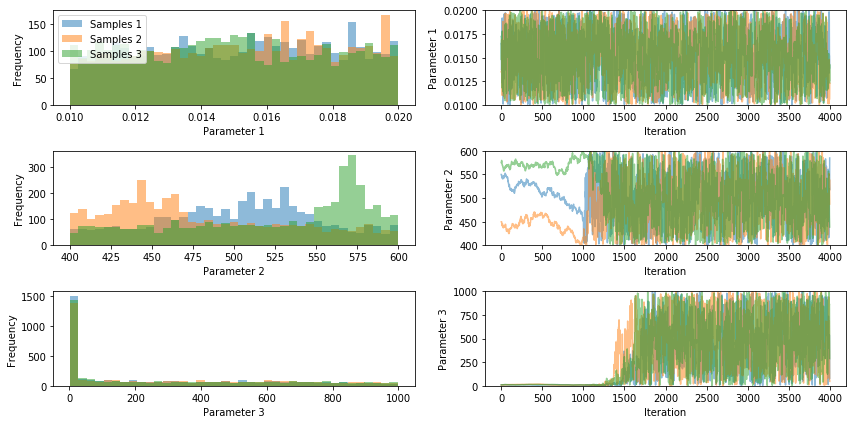

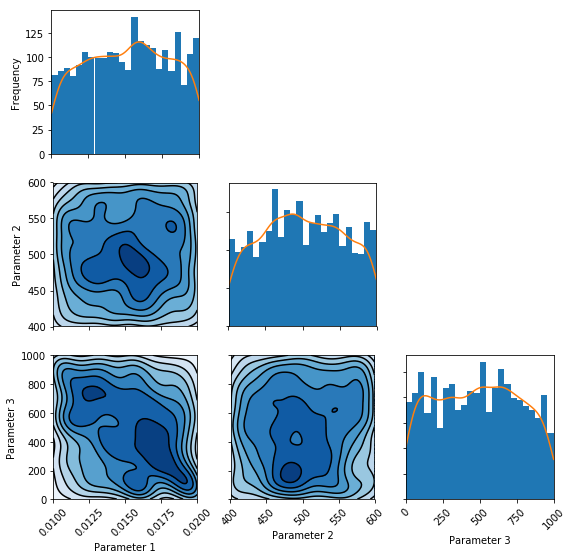

In [1]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.DramMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Start adapting after 1000 iterations
mcmc.set_initial_phase_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

Running...
Done!


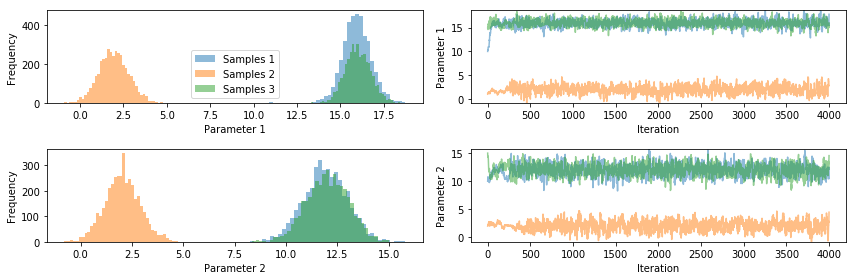

R-hat:
[9.575140971241618, 5.8006586927583621]


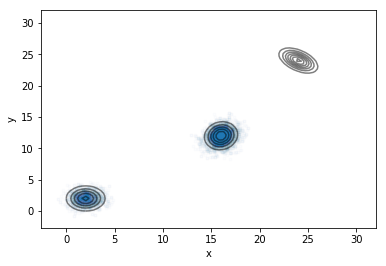

In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a multi-modal logpdf
log_pdf = pints.toy.MultimodalNormalLogPDF(
    [
        [2, 2],
        [16, 12],
        [24, 24],
    ],
    [
        [[1.2, 0.0], [0.0, 1.2]],
        [[0.8, 0.1], [0.1, 1.4]],
        [[1.0, -0.5], [-0.5, 1.0]],
    ]        
)

# Choose starting points for 3 mcmc chains
xs = [[10, 10], [1,2], [15,15]]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_pdf, 3, xs, method=pints.DramMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)
plt.show()

# Discard warm up
chains = chains[:, 2000:, :]

# Print Rhat
print('R-hat:')
print(pints.rhat_all_params(chains))

samples = np.vstack(chains)
x = np.linspace(0, 32, 80)
y = np.linspace(0, 32, 80)
X, Y = np.meshgrid(x, y)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(samples[:,0], samples[:,1], marker='.', alpha=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
for i in range(0, 1):
    print(i)

0


In [3]:
Y = [1,2,3,4,5,6]

In [15]:
Z = Y[::-1]

In [19]:
Z[0]

6

In [7]:
np.concatenate([[3], [1,2]])

array([3, 1, 2])